In [253]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def createDurationPlot(turn_ratio, short_name, long_name, end_row=None, start_row=None, ax=None, batch=False):
    
    filename = "../simulation/results/compiled_results/duration_{}_dataset_1x1_{}.txt".format(short_name,
                                                                                              turn_ratio)
    
    df = pd.read_csv(filename, delimiter=" ", header=None)

    df.columns = ["Traffic Density",
                  "Traffic Lights",
                  "Virtual Traffic Lights",
                  "My Traffic Controller",
                  "Modified MTC"]

    df.drop(columns=["Modified MTC"], inplace=True)

    if start_row != None:
        if end_row != None:
            df = df.iloc[start_row:end_row]
        else:
            df = df.iloc[start_row:]
    elif end_row != None:
        df = df.iloc[:end_row]

    df.set_index("Traffic Density", inplace=True)

    if ax == None:
        ax = df.plot(figsize=(8, 6))
    else:
        df.plot(ax=ax)

    ax.set_title("{} Journey Duration vs Traffic Density".format(long_name))
    ax.set_xlabel("Traffic Density (cars per minute)")
    ax.set_ylabel("{} Journey Duration (seconds)".format(long_name))

    if not batch:
        plt.savefig("duration_{}_plot_1x1_{}.png".format(short_name, turn_ratio))

def createMeanPlot(turn_ratio, end_row=None, start_row=None, axis=None, batch=False):
    createDurationPlot(turn_ratio, "mean", "Mean", end_row, start_row, axis, batch)

def createMaxPlot(turn_ratio, end_row=None, start_row=None, axis=None, batch=False):
    createDurationPlot(turn_ratio, "max", "Maximum", end_row, start_row, axis, batch)

def createMinPlot(turn_ratio, end_row=None, start_row=None, axis=None, batch=False):
    createDurationPlot(turn_ratio, "min", "Minimum", end_row, start_row, axis, batch)

def createStdevPlot(turn_ratio, end_row=None, start_row=None, axis=None, batch=False):
    createDurationPlot(turn_ratio, "stdev", "Standard Deviation of", end_row, start_row, axis, batch)        

def createFailsPlot(turn_ratio, start_row=None, end_row=None, ax=None, batch=False):
    
    filename = "../simulation/results/compiled_results/fails_dataset_1x1_{}.txt".format(turn_ratio)
    
    df = pd.read_csv(filename, delimiter=" ", header=None)

    df.columns = ["Traffic Density",
                  "Traffic Lights",
                  "Virtual Traffic Lights",
                  "My Traffic Controller",
                  "Modified MTC"]

    df.drop(columns=["Modified MTC"], inplace=True)

    if start_row != None:
        if end_row != None:
            df = df.iloc[start_row:end_row]
        else:
            df = df.iloc[start_row:]
    elif end_row != None:
        df = df.iloc[:end_row]

    df.set_index("Traffic Density", inplace=True)
    
    if ax == None:
        ax = df.plot(kind='bar', figsize=(10, 7))
    else:
        df.plot(kind='bar', ax=ax)

    ax.set_title("Failed Test Cases vs Traffic Density")
    ax.set_xlabel("Traffic Density (cars per minute)")
    ax.set_ylabel("Number of Fails")

    if not batch:
        plt.savefig("fails_plot_1x1_{}.png".format(turn_ratio))


def durationTestSuite(turn_ratio, end_row=None, start_row=None, fails_start_row=None, fails_end_row=None):
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 7))
    
    createMeanPlot( turn_ratio, end_row,         start_row,     axes[0][0], True)
    createStdevPlot(turn_ratio, end_row,         start_row,     axes[1][0], True)
    createMaxPlot(  turn_ratio, end_row,         start_row,     axes[0][1], True)
    createMinPlot(  turn_ratio, end_row,         start_row,     axes[1][1], True)
    createFailsPlot(turn_ratio, fails_start_row, fails_end_row, axes[0][2], True)


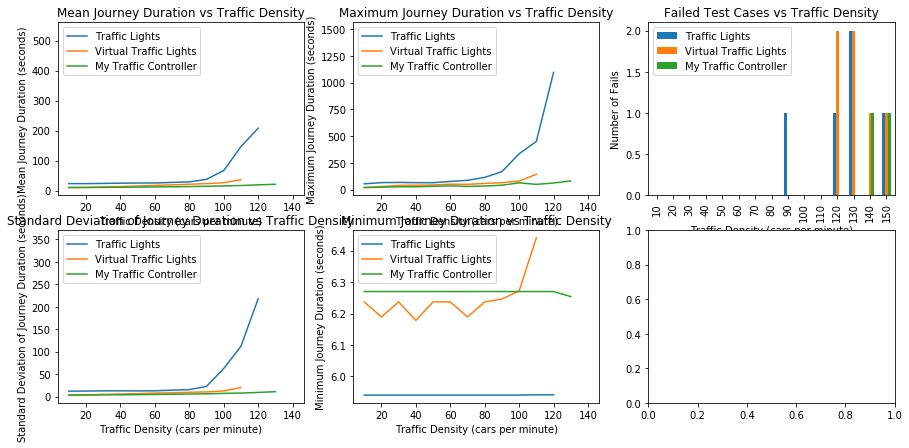

In [254]:
durationTestSuite("111")

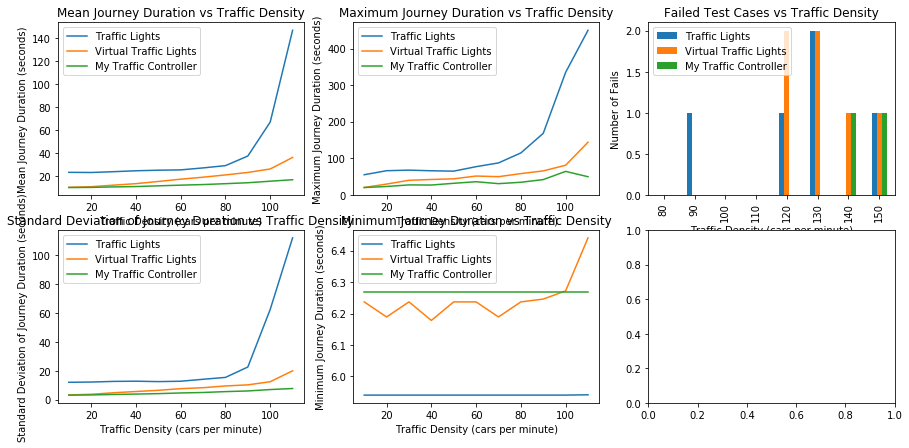

In [255]:
durationTestSuite("111", 11, 0, 7)

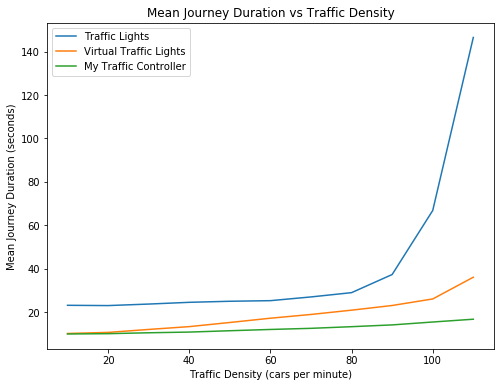

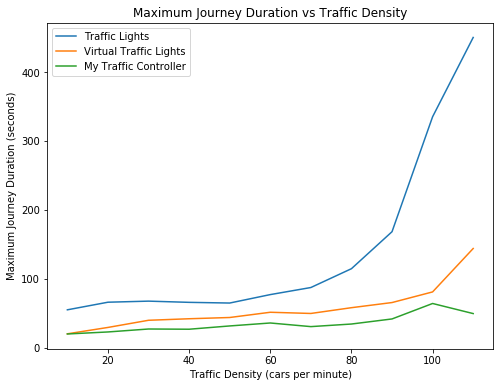

In [256]:
createMeanPlot("111", 11)
createMaxPlot( "111", 11)